# Google Playstore Case Study

In this module you’ll be learning data visualisation with the help of a case study. This will enable you to understand how visualisation aids you in solving business problems. 

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?




### Session 1 - Introduction to Data Visualisation

In [602]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [603]:
#read the dataset and check the first five rows
dtf=pd.read_csv('C:/Users/kriti/Downloads/Case+Study+Notebook/Case Study Notebook/googleplaystore_v2.csv')
dtf.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [604]:
#Check the shape of the dataframe
dtf.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These aforementioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [605]:
#Check the datatypes of all the columns of the dataframe
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [606]:
#Check the number of null values in the columns
dtf.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [607]:
#Handling missing value in our target variable- Rating
# SInce it is a very imp variable, We'll drop the rows where ratingis null
#Drop the rows having null values in the Rating field
dtf_1=dtf[-dtf['Rating'].isnull()]

#Check the shape of the dataframe
dtf_1.shape

(9367, 13)

In [608]:
# Check the number of nulls in the Rating field again to cross-verify
dtf_1.Rating.isnull().sum()

0

In [609]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values

dtf_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [610]:
#Inspect the nulls in the Android Version column
dtf_1[dtf_1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [611]:
#As we can see the 1st two rows are fine but the last row has inconsistent values that will effect all other columns. Either we can modify the columns or drop the row.

#Drop the row having shifted values
dtf_1=dtf_1[-((dtf_1['Android Ver'].isnull()) & (dtf_1['Category']=='1.9'))] # remember negation (-) should be put outside both the conditions else we may get a wrong result
#Check the nulls againin Android version column to cross-verify
dtf_1[dtf_1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Imputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [612]:
#Check the most common value in the Android version column
len(dtf_1[dtf_1['Android Ver']=="4.1 and up"])

# We can also solve this using value_counts()
dtf_1['Android Ver'].value_counts()

Android Ver
4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [613]:
#Fill up the nulls in the Android Version column with the above value
dtf_1['Android Ver']=dtf_1['Android Ver'].fillna(dtf_1['Android Ver'].mode()[0])

In [614]:
#Check the nulls in the Android version column again to cross-verify
dtf_1['Android Ver'].isnull().sum()

0

In [615]:
#Check the nulls in the entire dataframe again
dtf_1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [616]:
#Check the most common value in the Current version column
dtf_1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [617]:
#Replace the nulls in the Current version column with the above value
dtf_1[dtf_1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [618]:
dtf_1['Current Ver']=dtf_1['Current Ver'].fillna(dtf_1['Current Ver'].mode()[0])
dtf_1['Current Ver'].isnull().sum()

0

In [619]:
# Question : Check the most common value in the Current version column again
dtf_1['Current Ver'].value_counts()

Current Ver
Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

#### Handling Incorrect Data Types 

In [620]:
#Check the datatypes of all the columns 
dtf_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [621]:
#Analyse the Price column to check the issue
dtf_1['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [622]:
#Write the function to make the changes
def price_func(x):
    if x=='0':
        return 0
    x=x[1:]
    return float(x)
dtf_1['Price']=dtf_1['Price'].apply(price_func)

In [623]:
#Verify the dtype of Price once again
dtf_1['Price'].dtype

dtype('float64')

In [624]:
dtf_1[dtf_1['Android Ver']=="4.1 and up"]['Price'].mean()

0.8191606016496848

In [625]:
#Analyse the Reviews column
dtf_1['Reviews'].value_counts()


Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [626]:
#Change the dtype of this column
dtf_1['Reviews']=dtf_1['Reviews'].astype('int32')
#Check the quantitative spread of this dataframe

dtf_1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [627]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
def installs_func(x):
    x=x[:-1]
    x=x.replace(',','')
    return int(x)


In [628]:
dtf_1['Installs'].value_counts()

Installs
1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [629]:
dtf_1['Installs']=dtf_1.Installs.apply(installs_func)
dtf_1['Installs'].describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

In [630]:
dtf_1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [631]:
#Perform the sanity checks on the Reviews column
dtf_1[dtf_1['Reviews']>dtf_1['Installs']].shape

# Since reviews can't be more than installs, we'll remove those rows
dtf_1=dtf_1[dtf_1['Reviews'] <= dtf_1['Installs']]

In [632]:
dtf_1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [633]:
#perform the sanity checks on prices of free apps 
dtf_1[(dtf_1['Type']=='Free') & (dtf_1['Price']> 0.0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

Now you need to start identifying and removing extreme values or __outliers__ from our dataset. These values can tilt our analysis and often provide us with a biased perspective of the data available. This is where you’ll start utilising visualisation to achieve your tasks. And the best visualisation to use here would be the box plot. Boxplots are one of the best ways of analysing the spread of a numeric variable


Using a box plot you can identify the outliers as follows:

![BoxPlots to Identify Outliers](images\Boxplot.png)

- Outliers in data can arise due to genuine reasons or because of dubious entries. In the latter case, you should go ahead and remove such entries immediately. Use a boxplot to observe, analyse and remove them.
- In the former case, you should determine whether or not removing them would add value to your analysis procedure.

- You can create a box plot directly from pandas dataframe or the matplotlib way as you learnt in the previous session. Check out their official documentation here:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
   - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

In [634]:
#import the plotting libraries



<function matplotlib.pyplot.show(close=None, block=None)>

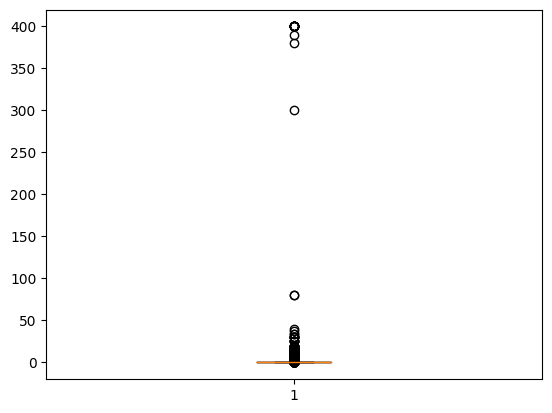

In [635]:
#Create a box plot for the price column
plt.boxplot(dtf_1['Price'])
plt.show

In [636]:
#Check the apps with price more than 200
dtf_1[dtf_1['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [637]:
#Clean the Price column
dtf_1=dtf_1[dtf_1['Price']<200]

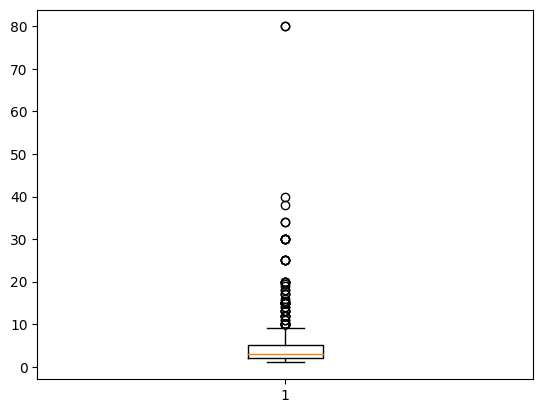

In [638]:
#Create a box plot for paid apps

plt.boxplot(dtf_1[dtf_1['Price']>0]['Price'])
plt.show()

In [639]:
#Check the apps with price more than 30
dtf_1[dtf_1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [640]:
#Clean the Price column again
dtf_1=dtf_1[dtf_1['Price']<= 30]

### Histograms

Histograms can also be used in conjuction with boxplots for data cleaning and data handling purposes. You can use it to check the spread of a numeric variable. Histograms generally work by bucketing the entire range of values that a particular variable takes to specific __bins__. After that, it uses vertical bars to denote the total number of records in a specific bin, which is also known as its __frequency__.


![Histogram](images\Histogram.png)

You can adjust the number of bins to improve its granularity

![Bins change](images\Granular.png)

You'll be using plt.hist() to plot a histogram. Check out its official documentation:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

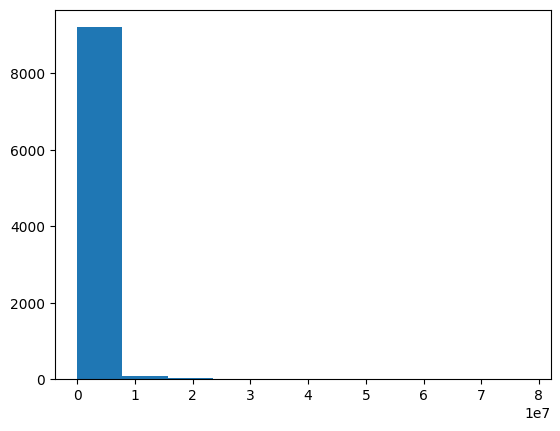

In [641]:
#Create a histogram of the Reviews
plt.hist(dtf_1.Reviews)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27e178826d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27e17885a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e17881450>],
 'medians': [<matplotlib.lines.Line2D at 0x27e178844d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e1789f450>],
 'means': []}

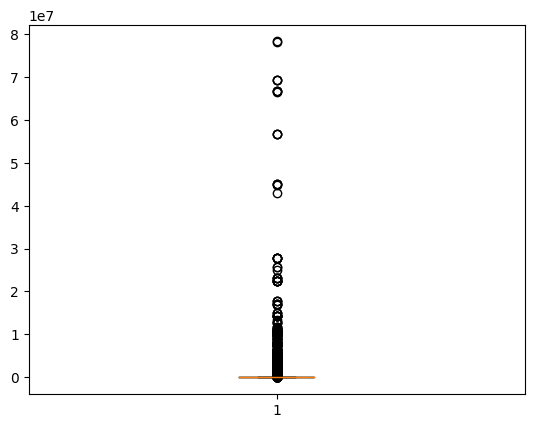

In [642]:
#Create a boxplot of the Reviews column

plt.boxplot(dtf_1['Reviews'])

In [643]:
dtf_1[dtf_1['Reviews']>10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [644]:
#Check records with 1 million reviews
dtf_1[dtf_1['Reviews']>10000000]['Category'].value_counts()

Category
GAME                  35
COMMUNICATION         22
SOCIAL                10
FAMILY                 9
TOOLS                  6
PHOTOGRAPHY            4
NEWS_AND_MAGAZINES     3
VIDEO_PLAYERS          2
SPORTS                 1
Name: count, dtype: int64

In [645]:
#Drop the above records
dtf_1=dtf_1[dtf_1['Reviews']<=10000000]


(array([8626.,  258.,   99.,   64.,   60.,   51.,   33.,   23.,   14.,
          18.]),
 array([1.0000000e+00, 9.8838150e+05, 1.9767620e+06, 2.9651425e+06,
        3.9535230e+06, 4.9419035e+06, 5.9302840e+06, 6.9186645e+06,
        7.9070450e+06, 8.8954255e+06, 9.8838060e+06]),
 <BarContainer object of 10 artists>)

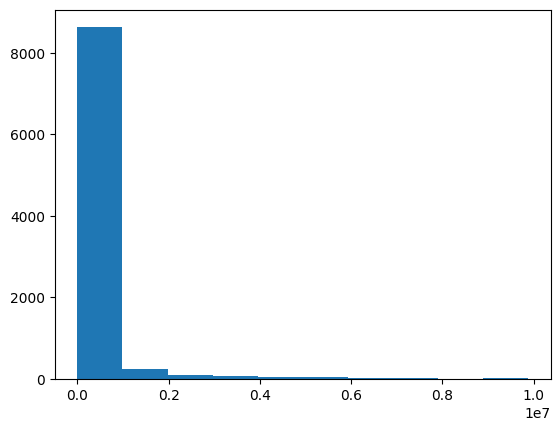

In [646]:
#Question - Create a histogram again and check the peaks

plt.hist(dtf_1.Reviews)

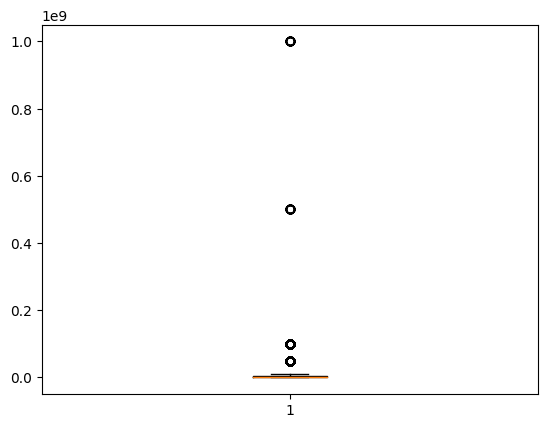

In [647]:
#Question - Create a box plot for the Installs column and report back the IQR
plt.boxplot(dtf_1.Installs)
plt.show()


In [648]:
dtf_1['Installs'].describe()

count    9.246000e+03
mean     1.303561e+07
std      6.865554e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [649]:
Q1 = dtf_1['Installs'].quantile(0.25)
Q3 = dtf_1['Installs'].quantile(0.75)
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("Interquartile Range (IQR):", IQR)

Q1: 10000.0
Q3: 5000000.0
Interquartile Range (IQR): 4990000.0


In [703]:
#Question - CLean the Installs by removing all the apps having more than or equal to 100 million installs
dtf_1[dtf_1['Installs']>= 10**8]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
139,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device
143,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814080,21516.529524,100000000,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
339,Messenger Lite: Free Calls & Messages,COMMUNICATION,4.4,1429035,21516.529524,100000000,Free,0.0,Everyone,Communication,"July 25, 2018",37.0.0.7.163,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.000000,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590,12000.000000,100000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up
10327,Garena Free Fire,GAME,4.5,5534114,53000.000000,100000000,Free,0.0,Teen,Action,"August 3, 2018",1.21.0,4.0.3 and up
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,21516.529524,100000000,Free,0.0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device


In [704]:
dtf_1 = dtf_1[dtf_1.Installs <100000000]

dtf_1.shape

(8799, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x27e1898e150>,
 'caps': [<matplotlib.lines.Line2D at 0x27e1898f510>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e1898d7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x27e189984d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e15f08d10>],
 'means': []}

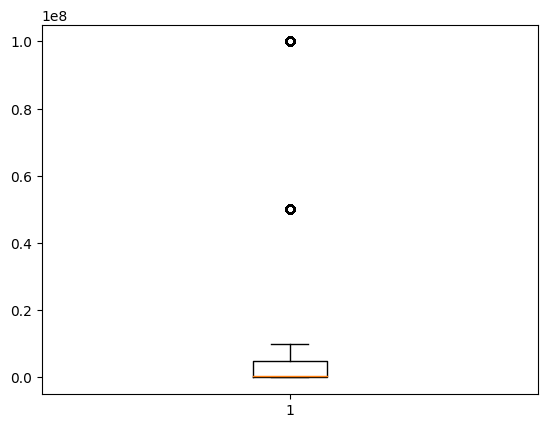

In [652]:
plt.boxplot(dtf_1['Installs'])

(array([8510.,    0.,    0.,    0.,  289.,    0.,    0.,    0.,    0.,
         378.]),
 array([5.00000000e+00, 1.00000045e+07, 2.00000040e+07, 3.00000035e+07,
        4.00000030e+07, 5.00000025e+07, 6.00000020e+07, 7.00000015e+07,
        8.00000010e+07, 9.00000005e+07, 1.00000000e+08]),
 <BarContainer object of 10 artists>)

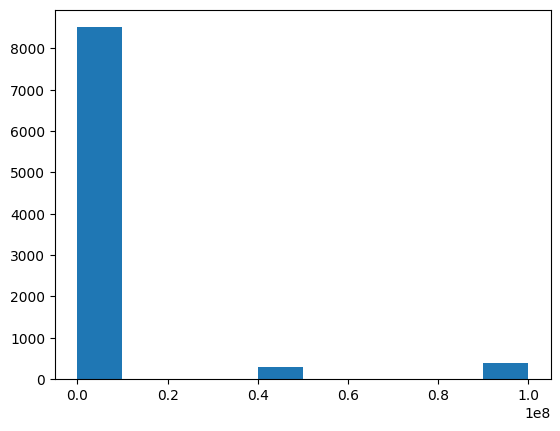

In [653]:
plt.hist(dtf_1['Installs'])

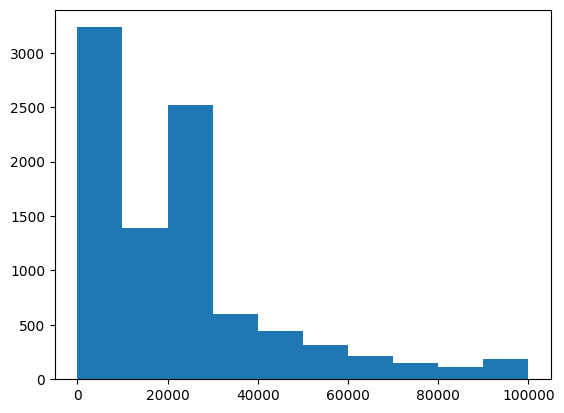

In [654]:
#Plot a histogram for Size as well.
plt.hist(dtf_1['Size'])
plt.show()

In [705]:
dtf_1['Size'].value_counts()

Size
21516.529524    1338
14000.000000     164
12000.000000     156
15000.000000     152
13000.000000     151
                ... 
383.000000         1
454.000000         1
812.000000         1
442.000000         1
619.000000         1
Name: count, Length: 412, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x27e174a2250>,
 'caps': [<matplotlib.lines.Line2D at 0x27e17872b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x27e17826010>],
 'medians': [<matplotlib.lines.Line2D at 0x27e178f6b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x27e188d9310>],
 'means': []}

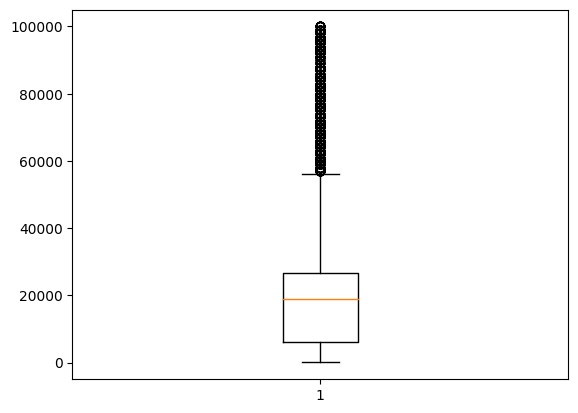

In [706]:
#Question - Create a boxplot for the Size column and report back the median value
plt.boxplot(dtf_1['Size'])

In [707]:
dtf_1['Size'].describe()

count      8799.000000
mean      21969.905103
std       20901.646001
min           8.500000
25%        6200.000000
50%       19000.000000
75%       26500.000000
max      100000.000000
Name: Size, dtype: float64

### Session 2 - Data Visualisation with Seaborn

Seaborn is Python library to create statistical graphs easily. It is built on top of matplotlib and closely integrated with pandas.

_Functionalities of Seaborn_ :

- Dataset oriented API
- Analysing univariate and bivariate distributions
- Automatic estimation and plotting of  linear regression models
- Convenient views for complex datasets
- Concise control over style
- Colour palettes


In [709]:
#import the necessary libraries
import seaborn as sns

#### Distribution Plots

A distribution plot is pretty similar to the histogram functionality in matplotlib. Instead of a frequency plot, it plots an approximate probability density for that rating bucket. And the curve (or the __KDE__) that gets drawn over the distribution is the approximate probability density curve. 

The following is an example of a distribution plot. Notice that now instead of frequency on the left axis, it has the density for each bin or bucket.

![Distplot](images\Distplot.png)

You'll be using sns.distplot for plotting a distribution plot. Check out its official documentation: https://seaborn.pydata.org/generated/seaborn.distplot.html

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\910217401.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf_1['Rating'])


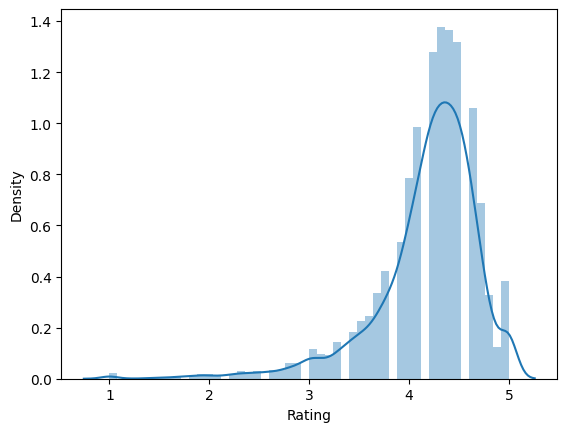

In [712]:
#Create a distribution plot for rating
sns.distplot(dtf_1['Rating'])
plt.show()

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\1979004027.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf_1['Rating'],bins=15)


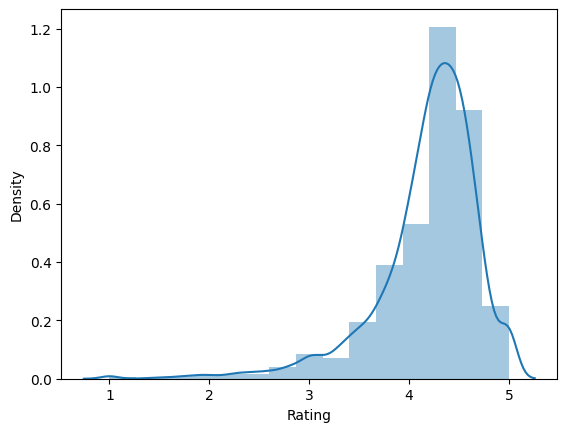

In [713]:
#Change the number of bins
sns.distplot(dtf_1['Rating'],bins=15)
plt.show()


C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\794612638.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf_1['Rating'],bins=15,color='r')


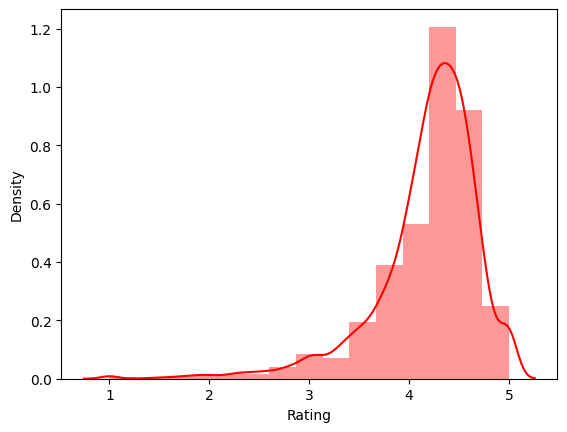

In [715]:
#Change the colour of bins to green
sns.distplot(dtf_1['Rating'],bins=15,color='r')
plt.show()

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\3135493198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf_1['Rating'],bins=15,color='m')


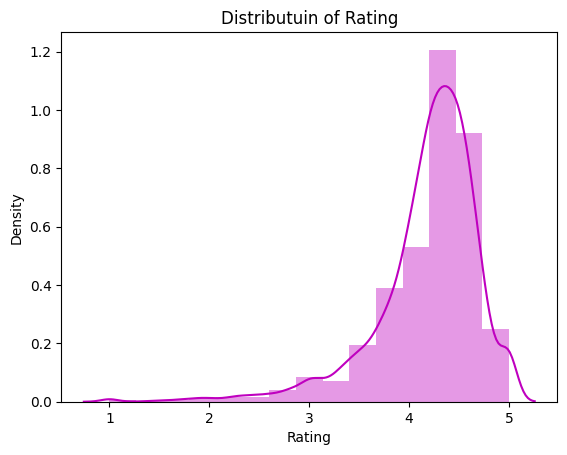

In [716]:
#Apply matplotlib functionalities
sns.distplot(dtf_1['Rating'],bins=15,color='m')
plt.title('Distributuin of Rating')
plt.show()


#### Styling Options

One of the biggest advantages of using Seaborn is that you can retain its aesthetic properties and also the Matplotlib functionalities to perform additional customisations. Before we continue with our case study analysis, let’s study some styling options that are available in Seaborn.

-  Check out the official documentation:https://seaborn.pydata.org/generated/seaborn.set_style.html

In [718]:
#Check all the styling options
?sns.set_style

Signature: sns.set_style(style=None, rc=None)
Docstring:
Set the parameters that control the general style of the plots.

The style parameters control properties like the color of the background and
whether a grid is enabled by default. This is accomplished using the
matplotlib rcParams system.

The options are illustrated in the
:doc:`aesthetics tutorial <../tutorial/aesthetics>`.

See :func:`axes_style` to get the parameter values.

Parameters
----------
style : dict, or one of {darkgrid, whitegrid, dark, white, ticks}
    A dictionary of parameters or the name of a preconfigured style.
rc : dict, optional
    Parameter mappings to override the values in the preset seaborn
    style dictionaries. This only updates parameters that are
    considered part of the style definition.

Examples
--------

.. include:: ../docstrings/set_style.rst
File:      c:\users\kriti\appdata\local\programs\python\python311\lib\site-packages\seaborn\rcmod.py
Type:      function

In [719]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [724]:
#Change the number of bins to 20
plt.style.use('seaborn-v0_8-pastel')

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\1527560419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtf_1['Rating'],bins=15,color='m')


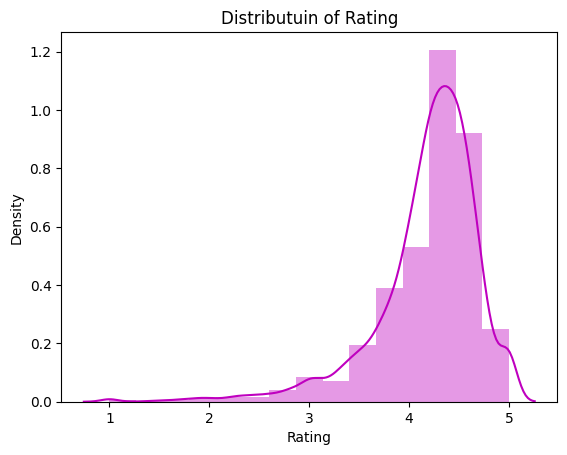

In [725]:
sns.distplot(dtf_1['Rating'],bins=15,color='m')
plt.title('Distributuin of Rating')
plt.show()

#### Pie-Chart and Bar Chart

For analysing how a numeric variable changes across several categories of a categorical variable you utilise either a pie chart or a box plot

For example, if you want to visualise the responses of a marketing campaign, you can use the following views:

![PieChart](images\pie.png)

![barChart](images\bar.png)

In the earlier visualisations, you’re dealing only with numeric variables. Now you’ll step into analysing the categorical variables and see how the Ratings vary across each of them. Note that in the case of categorical variables, you need to use aggregates or measures like sum, average and median to plot the visualisations. And then use plots like a bar chart or pie chart to portray those relationships.

- You'll be using the pandas method of plotting both a pie chart and a bar chart. Check out their official documentations:
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html
   - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

In [726]:
#Analyse the Content Rating column
dtf_1['Content Rating'].value_counts()

Content Rating
Everyone           7019
Teen                992
Mature 17+          435
Everyone 10+        349
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [729]:
#Remove the rows with values which are less represented 
dtf=dtf_1[-dtf_1['Content Rating'].isin(['Adults only 18+','Unrated'])]
dtf.shape

(8795, 13)

In [730]:
#Reset the index
dtf.reset_index()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8790,10834,FR Calculator,FAMILY,4.0,7,2600.000000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
8791,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
8792,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.000000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
8793,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.529524,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [731]:
#Check the apps belonging to different categories of Content Rating 
dtf['Content Rating'].value_counts()

Content Rating
Everyone        7019
Teen             992
Mature 17+       435
Everyone 10+     349
Name: count, dtype: int64

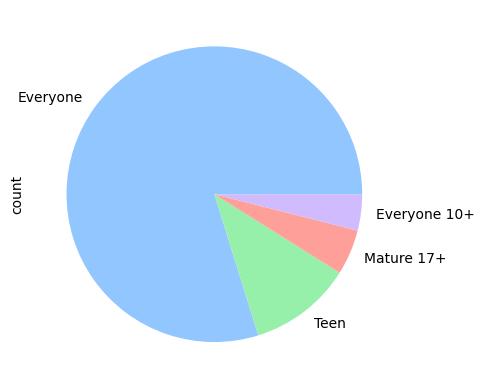

In [733]:
#Plot a pie chart
dtf['Content Rating'].value_counts().plot.pie()
plt.show()

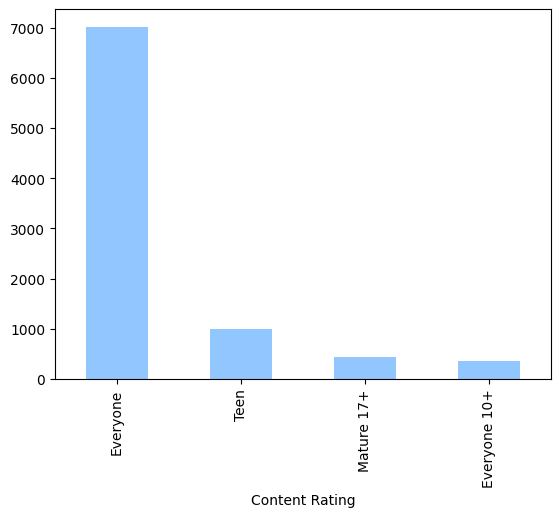

In [734]:
#Plot a bar chart
dtf['Content Rating'].value_counts().plot.bar()
plt.show()

In [735]:
dtf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


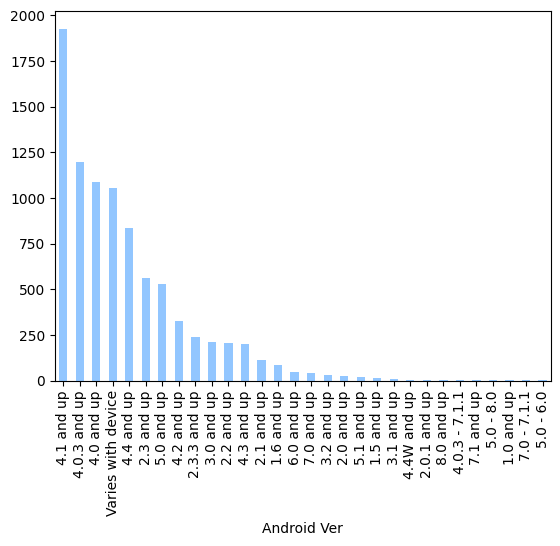

In [736]:
#Question - Plot a bar plot for checking the 4th highest Android version type
dtf['Android Ver'].value_counts().plot.bar()
plt.show()

#### Scatter Plots

Scatterplots are perhaps one of the most commonly used as well one of the most powerful visualisations you can use in the field of machine learning. They are pretty crucial in revealing relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot. 

![Scatterplot](images\scatter.png)

- They're pretty useful in regression problems to check whether a linear trend exists in the data or not. For example, in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.

![Scatterplot-Reg](images\regression3.png)

- Also, they help in observing __naturally occuring clusters__. In the following image, the marks of students in Maths and Biology has been plotted.You can clearly group the students to 4 clusters now. Cluster 1 are students who score very well in Biology but very poorly in Maths, Cluster 2 are students who score equally well in both the subjects and so on.

![Scatter-Clusters](images\Clusters.png)

**Note**: You'll be studying about both Regression and Clustering in greater detail in the machine learning modules

You'll be using **sns.jointplot()** for creating a scatter plot. Check out its documentation:
https://seaborn.pydata.org/generated/seaborn.jointplot.html

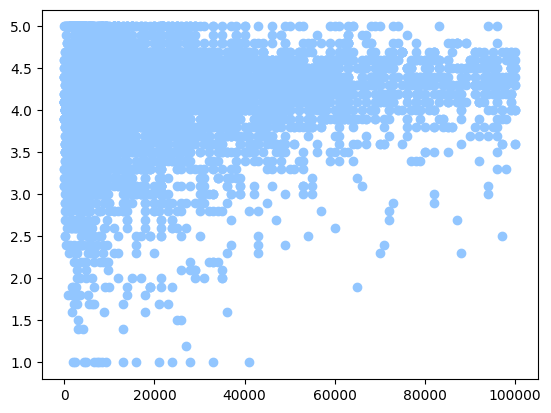

In [739]:
###Size vs Rating

##Plot a scatter-plot in the matplotlib way between Size and Rating
plt.scatter(dtf.Size,dtf.Rating)
plt.show()

In [742]:
plt.use.style('white')

AttributeError: module 'matplotlib.pyplot' has no attribute 'use'

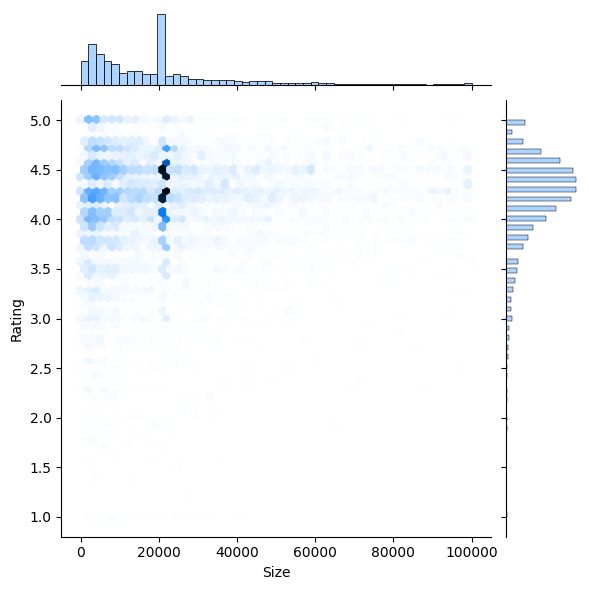

In [747]:
### Plot the same thing now using a jointplot
sns.jointplot(data=dtf,x=dtf.Size,y=dtf.Rating,kind='hex')
plt.show()

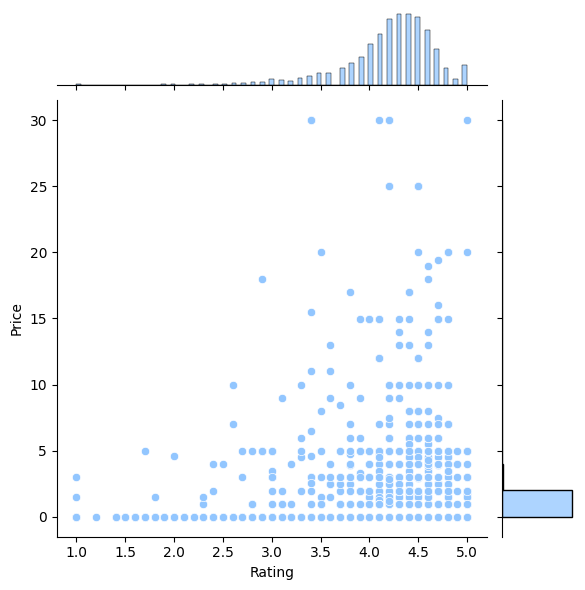

In [749]:
## Plot a jointplot for Price and Rating
sns.jointplot(x=dtf.Rating,y=dtf.Price)

**Reg Plots**

- These are an extension to the jointplots, where a regression line is added to the view 

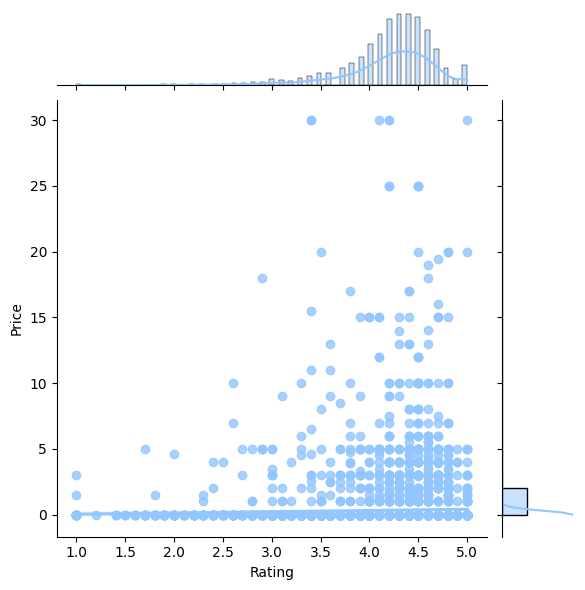

In [750]:
##Plot a reg plot for Price and Rating and observe the trend

## Plot a jointplot for Price and Rating
sns.jointplot(x=dtf.Rating,y=dtf.Price,kind='reg')
plt.show()

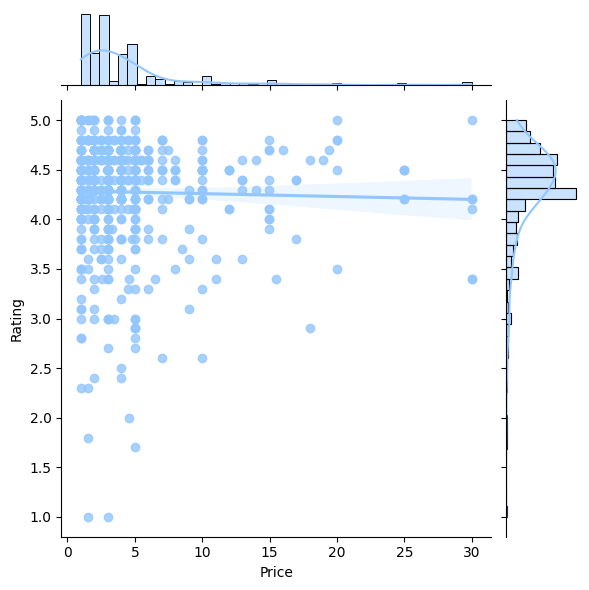

In [752]:
## Question - Plot a reg plot for Price and Rating again for only the paid apps.
sns.jointplot(x=dtf[dtf['Type']=='Paid']['Price'],y=dtf[dtf['Type']=='Paid']['Rating'],kind='reg')
plt.show()

**Pair Plots**

 - When you have several numeric variables, making multiple scatter plots becomes rather tedious. Therefore, a pair plot visualisation is preferred where all the scatter plots are in a single view in the form of a matrix
 - For the non-diagonal views, it plots a **scatter plot** between 2 numeric variables
 - For the diagonal views, it plots a **histogram**

Pair Plots help in identifying the trends between a target variable and the predictor variables pretty quickly. For example, say you want to predict how your company’s profits are affected by three different factors. In order to choose which you created a pair plot containing profits and the three different factors as the variables. Here are the scatterplots of profits vs the three variables that you obtained from the pair plot.

![Pairplots](images\pairplots2.png)

It is clearly visible that the left-most factor is the most prominently related to the profits, given how linearly scattered the points are and how randomly scattered the rest two factors are.

You'll be using **sns.pairplot()** for this visualisation. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.pairplot.html

c:\Users\kriti\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


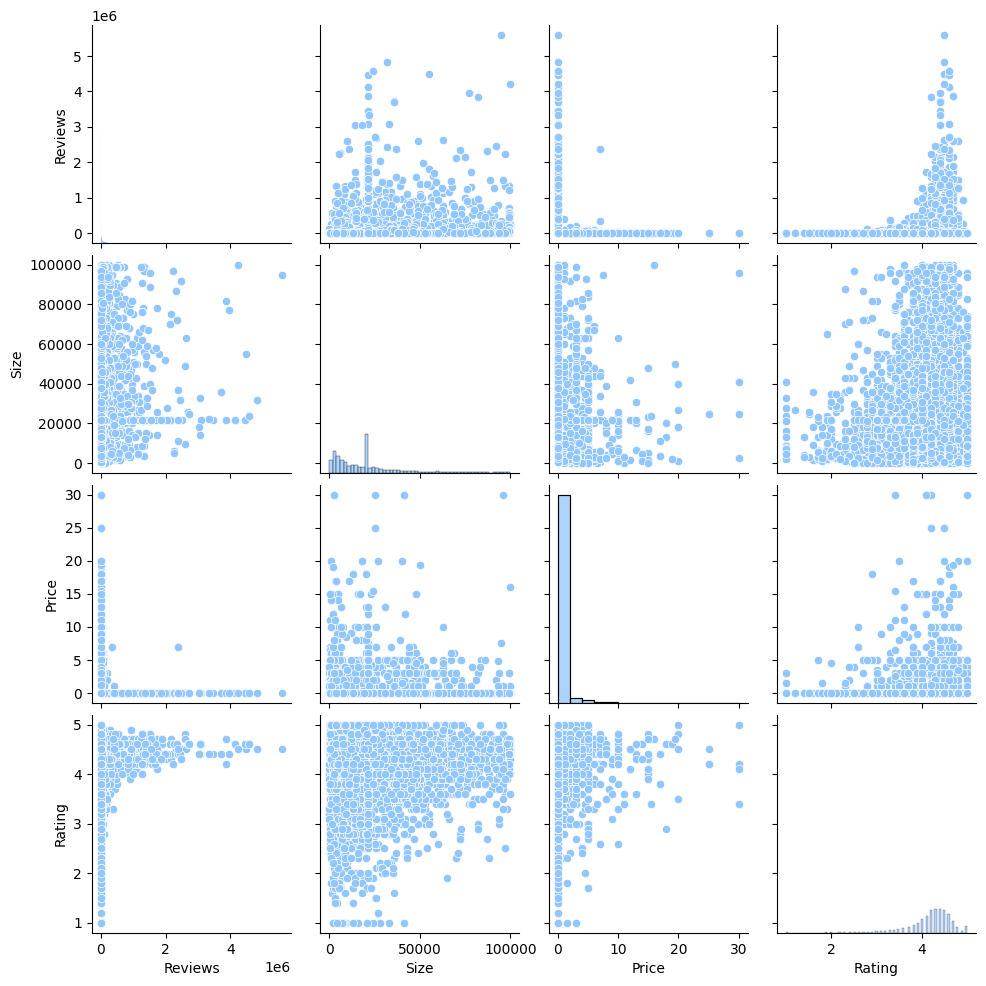

In [754]:
## Create a pair plot for Reviews, Size, Price and Rating
sns.pairplot(dtf[['Reviews','Size','Price','Rating']])
plt.show()

**Bar Charts Revisited**

- Here, you'll be using bar charts once again, this time using the **sns.barplot()** function. Check out its official documentation:https://seaborn.pydata.org/generated/seaborn.barplot.html
- You can modify the **estimator** parameter to change the aggregation value of your barplot

<Axes: xlabel='Content Rating'>

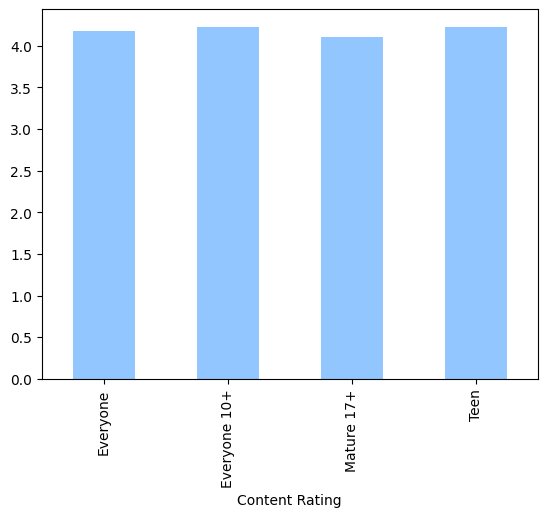

In [755]:
##Plot a bar plot of Content Rating vs Average Rating 
dtf.groupby(['Content Rating'])['Rating'].mean().plot.bar()

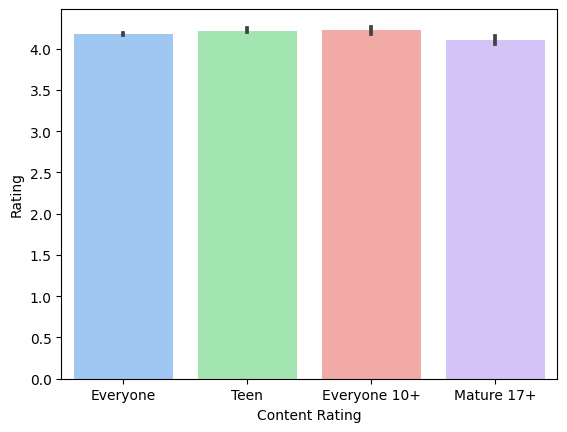

In [756]:
##Plot the bar plot again with Median Rating
sns.barplot(data=dtf,x=dtf['Content Rating'],y=dtf['Rating'])
plt.show()

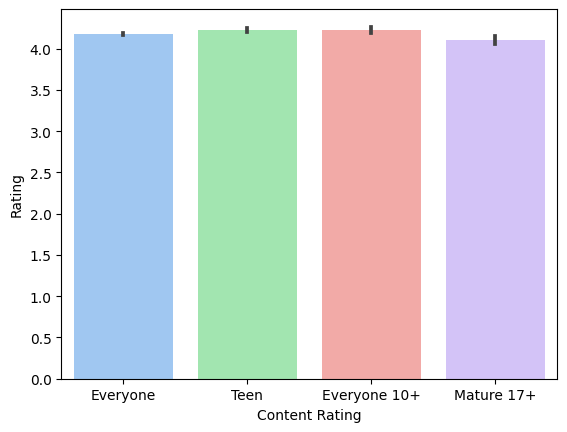

In [758]:
##Plot the above bar plot using the estimator parameter
##Plot the bar plot again with Median Rating
sns.barplot(data=dtf,x=dtf['Content Rating'],y=dtf['Rating'],estimator='mean')
plt.show()


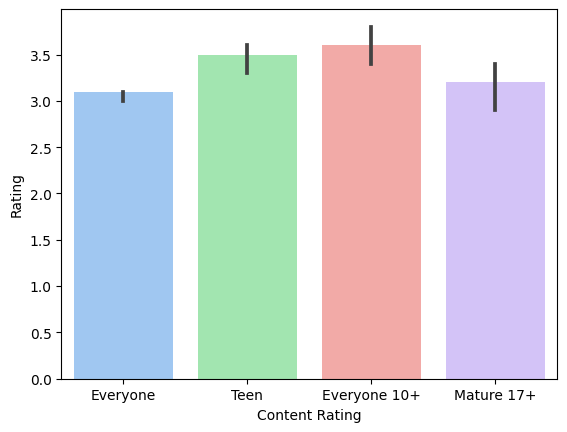

In [759]:
##Plot the bar plot with only the 5th percentile of Ratings
##Plot the bar plot again with Median Rating
sns.barplot(data=dtf,x=dtf['Content Rating'],y=dtf['Rating'],estimator=lambda x: np.quantile(x,0.05))
plt.show()

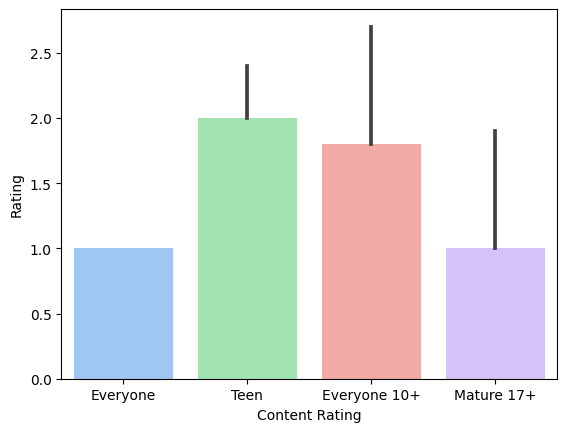

In [770]:
##Question - Plot the bar plot with the minimum Rating

sns.barplot(data=dtf,x=dtf['Content Rating'],y=dtf['Rating'],estimator='min')
plt.show()

__Box Plots Revisited__

- Apart from outlier analysis, box plots are great at comparing the spread and analysing a numerical variable across several categories
- Here you'll be using **sns.boxplot()** function to plot the visualisation. Check out its documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html




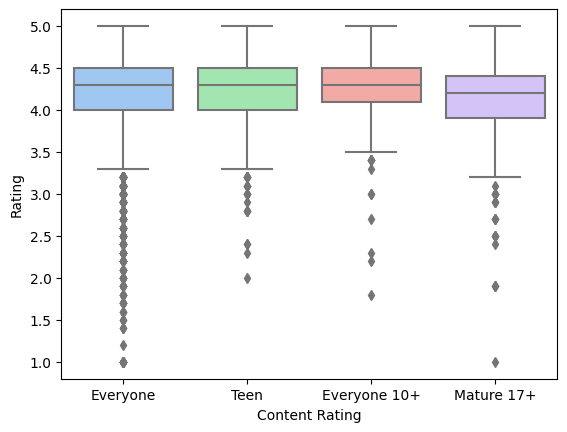

In [772]:
##Plot a box plot of Rating vs Content Rating
sns.boxplot(x=dtf['Content Rating'],y=dtf['Rating'])
plt.show()

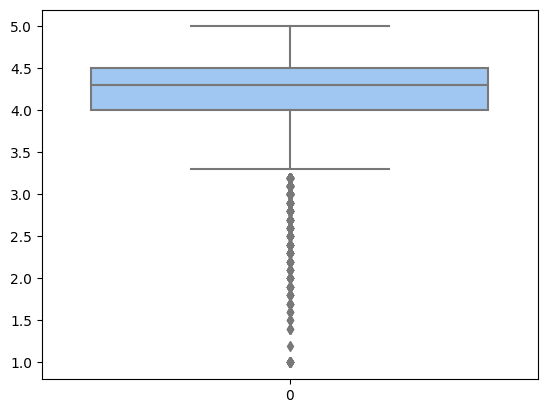

In [773]:
##Question - Plot a box plot for the Rating column only
sns.boxplot(dtf['Rating'])
plt.show()

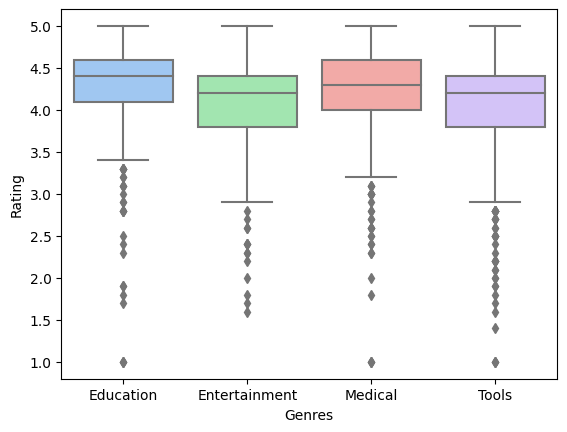

In [776]:
##Question - Plot a box plot of Ratings across the 4 most popular Genres
dtf['Genres'].value_counts()
genre_data=dtf[dtf['Genres'].isin(['Tools','Entertainment','Education','Medical'])]
sns.boxplot(x=genre_data['Genres'],y=genre_data['Rating'])
plt.show()

#### Heat Maps

Heat mapsutilise the concept of using colours and colour intensities to visualise a range of values. You must have seen heat maps in cricket or football broadcasts on television to denote the players’ areas of strength and weakness.

![HeatMap](images\heatmap1.png)

- In python, you can create a heat map whenever you have a rectangular grid or table of numbers analysing any two features

![heatmap2](images\heatmap2.png)

- You'll be using **sns.heatmap()** to plot the visualisation. Checkout its official documentation :https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [777]:
##Ratings vs Size vs Content Rating

##Prepare buckets for the Size column using pd.qcut

dtf['size_bucket']=pd.qcut(dtf['Size'],[0,0.2,0.4,0.6,0.8,1],['vl','l','m','h','vh'])
dtf['size_bucket']

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\4072400895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['size_bucket']=pd.qcut(dtf['Size'],[0,0.2,0.4,0.6,0.8,1],['vl','l','m','h','vh'])


0         m
1         m
2         l
3         h
4        vl
         ..
10834    vl
10836    vh
10837    vl
10839     m
10840     m
Name: size_bucket, Length: 8795, dtype: category
Categories (5, object): ['vl' < 'l' < 'm' < 'h' < 'vh']

In [778]:
dtf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,m
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,m
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,l
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,h
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,vl


In [782]:
##Create a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=dtf,index='Content Rating',columns='size_bucket',values='Rating')

size_bucket,vl,l,m,h,vh
Content Rating,,,,,
Everyone,4.115294,4.163309,4.225911,4.168142,4.198884
Everyone 10+,4.189474,4.207407,4.243636,4.215385,4.228906
Mature 17+,3.969231,4.129787,4.045714,4.165574,4.196040
Teen,4.190000,4.231618,4.175884,4.218182,4.268827


In [784]:
##Change the aggregation to median
pd.pivot_table(data=dtf,index='Content Rating',columns='size_bucket',values='Rating',aggfunc=np.median)

size_bucket,vl,l,m,h,vh
Content Rating,,,,,
Everyone,4.20,4.3,4.3,4.3,4.3
Everyone 10+,4.10,4.3,4.3,4.3,4.3
Mature 17+,4.20,4.2,4.2,4.1,4.2
Teen,4.25,4.3,4.2,4.2,4.3


In [786]:
##Change the aggregation to 20th percentile

pd.pivot_table(data=dtf,index='Content Rating',columns='size_bucket',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))

size_bucket,vl,l,m,h,vh
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.70,3.8,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


In [787]:
##Store the pivot table in a separate variable
piv_tb=pd.pivot_table(data=dtf,index='Content Rating',columns='size_bucket',values='Rating',aggfunc=lambda x: np.quantile(x,0.2))

<Axes: xlabel='size_bucket', ylabel='Content Rating'>

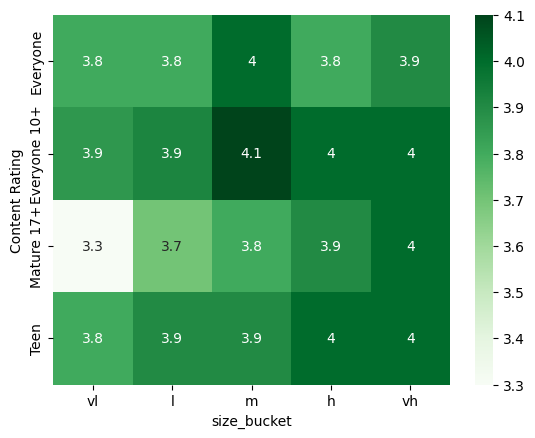

In [790]:
##Plot a heat map
sns.heatmap(piv_tb,cmap='Greens',annot=True)

In [792]:
dtf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,m
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,m
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,l
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,h
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,vl


In [794]:
dtf['Reviews'].describe()

count    8.795000e+03
mean     1.079610e+05
std      3.333422e+05
min      1.000000e+00
25%      1.550000e+02
50%      4.069000e+03
75%      5.260350e+04
max      5.591653e+06
Name: Reviews, dtype: float64

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\1027031630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['review_bucket']=pd.qcut(dtf['Size'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,1,2,3,4,5,6,7,8,9])


<Axes: xlabel='size_bucket', ylabel='review_bucket'>

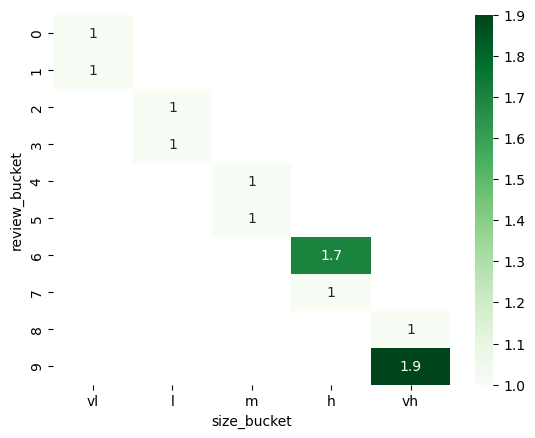

In [798]:
##Question - Replace Content Rating with Review_buckets in the above heat map
##Keep the aggregation at minimum value for Rating
dtf['review_bucket']=pd.qcut(dtf['Size'],[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],[0,1,2,3,4,5,6,7,8,9])
res=dtf.pivot_table(index='review_bucket',columns='size_bucket',values='Rating',aggfunc=min)
sns.heatmap(res,cmap='Greens',annot=True)


### Session 3: Additional Visualisations

#### Line Plots

- A line plot tries to observe trends using time dependent data.
-  For this part, you'll be using **pd.to_datetime()** function. Check out its documentation:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html


In [799]:
## Extract the month from the Last Updated Date

dtf['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

In [800]:
dtf['updated month']=pd.to_datetime(dtf['Last Updated']).dt.month

C:\Users\kriti\AppData\Local\Temp\ipykernel_30624\1720669125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['updated month']=pd.to_datetime(dtf['Last Updated']).dt.month


In [801]:
## Find the average Rating across all the months

dtf.groupby(['updated month'])['Rating'].mean()

updated month
1     4.145050
2     4.090385
3     4.109576
4     4.151553
5     4.160099
6     4.177799
7     4.235548
8     4.276402
9     4.041634
10    4.019687
11    4.103679
12    4.068278
Name: Rating, dtype: float64

<Axes: xlabel='updated month'>

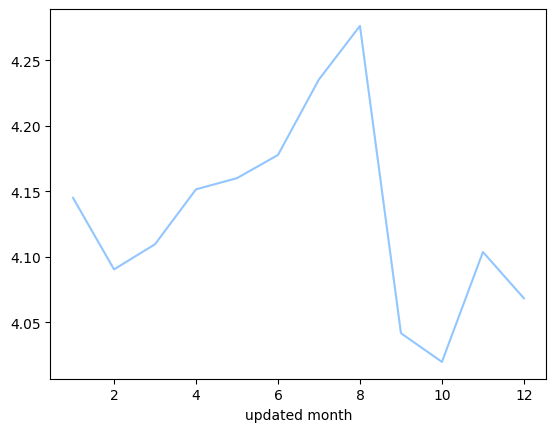

In [803]:
## Plot a line graph
dtf.groupby(['updated month'])['Rating'].mean().plot()


#### Stacked Bar Charts

- A stacked bar chart breaks down each bar of the bar chart on the basis of a different category
- For example, for the Campaign Response bar chart you saw earlier, the stacked bar chart is also showing the Gender bifurcation as well

![Stacked](images\stacked.png)

In [809]:
## Create a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=dtf,index='updated month',columns='Content Rating',values='Installs',aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,745365520,30322510,9111100,99850310
4,993371180,23300000,5259000,271619410
5,1731067800,128173500,110140100,462689600
6,2457170505,367727100,155257200,505716600
7,8791109680,826556000,839491910,2683556800
8,5290943320,215821000,562981700,1597855650
9,310340410,24931100,2201010,22483100


In [810]:
##Store the table in a separate variable
monthly=pd.pivot_table(data=dtf,index='updated month',columns='Content Rating',values='Installs',aggfunc=sum)

<Axes: xlabel='updated month'>

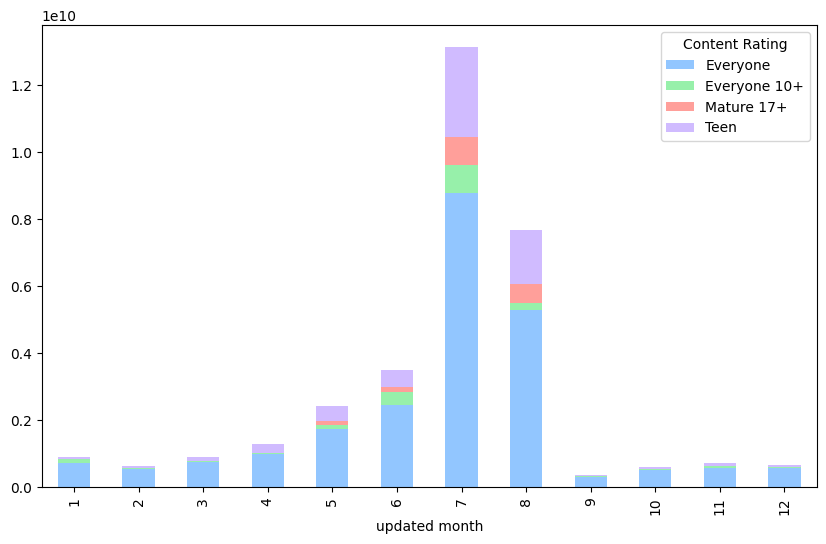

In [811]:
##Plot the stacked bar chart.
monthly.plot(kind='bar',stacked='True',figsize=[10,6])

In [812]:
monthly.columns

Index(['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen'], dtype='object', name='Content Rating')

In [814]:
##Plot the stacked bar chart again wrt to the proportions.
prop=monthly[['Everyone', 'Everyone 10+', 'Mature 17+', 'Teen']].apply(lambda x: x/x.sum(),axis=1)


<Axes: xlabel='updated month'>

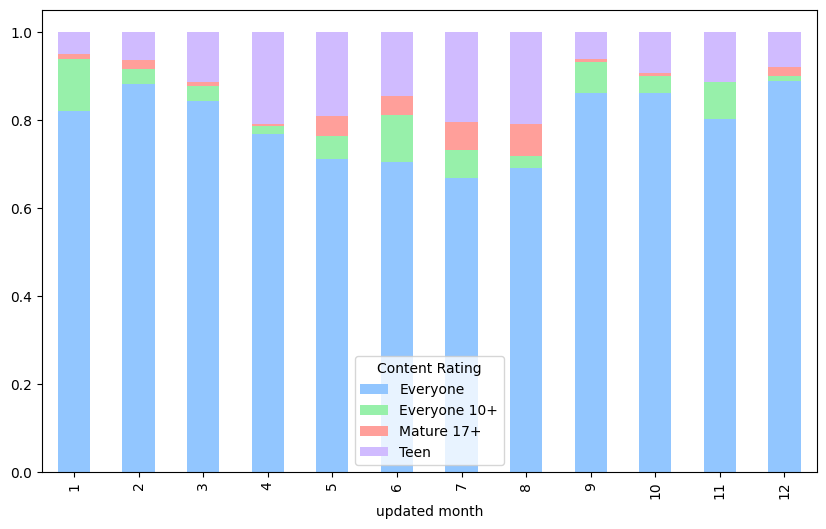

In [815]:
prop.plot(kind='bar',stacked='True',figsize=[10,6])

#### Plotly

Plotly is a Python library used for creating interactive visual charts. You can take a look at how you can use it to create aesthetic looking plots with a lot of user-friendly functionalities like hover, zoom, etc.

Check out this link for installation and documentation:https://plot.ly/python/getting-started/

In [699]:
#Install plotly


In [700]:
#Take the table you want to plot in a separate variable


In [701]:
#Import the plotly libraries


In [702]:
#Prepare the plot
